In [ ]:
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import numpy as np
import seaborn as sns

In [181]:
df_no_latency = pd.read_pickle("preprocessed_data/preprocessed_no_latency.pkl")
df_with_latency = pd.read_pickle("preprocessed_data/preprocessed_with_latency.pkl")

In [182]:
def visualize_anova_results(df, key, key_label, title, showErrorBars=True):
    grouped_data = df.groupby(['previouscongruency', 'currentcongruency'])[key].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.set_style('whitegrid')

    # Define markers and lines for current congruency
    markers = ['o', 's']
    linestyles = ['-', '--']
    colors = ['blue', 'red']
    labels = ['Current: Congruent', 'Current: Incongruent']

    x_mapping = {1: 0, 0: 1}

    # Create the plot
    for i, current in enumerate([1, 0]):
        subset = grouped_data[grouped_data['currentcongruency'] == current]
        subset = subset.sort_values('previouscongruency', ascending=False)
        x_values = [x_mapping[prev] for prev in subset['previouscongruency']]

        plt.plot(x_values, subset[key], 
                marker=markers[i], linestyle=linestyles[i], color=colors[i], 
                linewidth=2, markersize=10, label=labels[i])

    # Customize x-axis
    plt.xticks([0, 1], ['Congruent', 'Incongruent'])
    plt.xlabel('Previous Congruency', fontsize=14)
    plt.ylabel(key_label, fontsize=14)
    plt.title(f'{title}', fontsize=16)
    plt.legend(loc='best', fontsize=12)

    # Add error bars (standard error)
    if showErrorBars:
        for i, current in enumerate([1, 0]):
            for j, previous in enumerate([1, 0]):
                subset = df[(df['currentcongruency'] == current) & (df['previouscongruency'] == previous)]
                mean = subset[key].mean()
                se = subset[key].std() / np.sqrt(len(subset))
                plt.errorbar(x_mapping[previous], mean, yerr=se, fmt='none', capsize=5, 
                            ecolor=colors[i], alpha=0.7)

    # Adjust layout
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

## 3-way ANOVA für Latenzkonditionen

In [206]:
df_combined = pd.concat([df_with_latency, df_no_latency])
df_combined_aggregated = df_combined.groupby(['participant_num', 'currentcongruency', 'previouscongruency', 'latency'])['reactiontime'].mean().reset_index()

In [207]:
aovrm = AnovaRM(df_combined_aggregated, 'reactiontime', 'participant_num', within=['latency', 'currentcongruency', 'previouscongruency'])
anova_res = aovrm.fit()

print(anova_res.summary())

                                   Anova
                                             F Value  Num DF  Den DF Pr > F
---------------------------------------------------------------------------
latency                                      131.1092 1.0000 15.0000 0.0000
currentcongruency                            125.0430 1.0000 15.0000 0.0000
previouscongruency                             6.5852 1.0000 15.0000 0.0215
latency:currentcongruency                      6.3121 1.0000 15.0000 0.0239
latency:previouscongruency                     0.4353 1.0000 15.0000 0.5194
currentcongruency:previouscongruency         109.5077 1.0000 15.0000 0.0000
latency:currentcongruency:previouscongruency   1.0635 1.0000 15.0000 0.3188



In [209]:
# Extract and print p-values specifically
print("\nANOVA Results - Congruency and Latency on Reactiontime:")
print("-" * 50)
results_df = anova_res.anova_table
print(f"Latency Effect: F({results_df.loc['latency', 'Num DF']:.1f}, {results_df.loc['latency', 'Den DF']:.1f}) = {results_df.loc['latency', 'F Value']:.2f}, p = {results_df.loc['latency', 'Pr > F']:.8f}")
print(f"Current Congruency Effect: F({results_df.loc['currentcongruency', 'Num DF']:.1f}, {results_df.loc['currentcongruency', 'Den DF']:.1f}) = {results_df.loc['currentcongruency', 'F Value']:.2f}, p = {results_df.loc['currentcongruency', 'Pr > F']:.8f}")
print(f"Previous Congruency Effect: F({results_df.loc['previouscongruency', 'Num DF']:.1f}, {results_df.loc['previouscongruency', 'Den DF']:.1f}) = {results_df.loc['previouscongruency', 'F Value']:.2f}, p = {results_df.loc['previouscongruency', 'Pr > F']:.6f}")
print(f"Interaction Effect of latency and previous congruency: F({results_df.loc['latency:previouscongruency', 'Num DF']:.1f}, {results_df.loc['latency:previouscongruency', 'Den DF']:.1f}) = {results_df.loc['latency:previouscongruency', 'F Value']:.2f}, p = {results_df.loc['latency:previouscongruency', 'Pr > F']:.8f}")
print(f"Interaction Effect of latency and current congruency: F({results_df.loc['latency:currentcongruency', 'Num DF']:.1f}, {results_df.loc['latency:currentcongruency', 'Den DF']:.1f}) = {results_df.loc['latency:currentcongruency', 'F Value']:.2f}, p = {results_df.loc['latency:currentcongruency', 'Pr > F']:.8f}")
print(f"Interaction Effect of previous and current congruency: F({results_df.loc['currentcongruency:previouscongruency', 'Num DF']:.1f}, {results_df.loc['currentcongruency:previouscongruency', 'Den DF']:.1f}) = {results_df.loc['currentcongruency:previouscongruency', 'F Value']:.2f}, p = {results_df.loc['currentcongruency:previouscongruency', 'Pr > F']:.8f}")
print(f"Interaction Effect of previous and current congruency and latency: F({results_df.loc['latency:currentcongruency:previouscongruency', 'Num DF']:.1f}, {results_df.loc['latency:currentcongruency:previouscongruency', 'Den DF']:.1f}) = {results_df.loc['latency:currentcongruency:previouscongruency', 'F Value']:.2f}, p = {results_df.loc['latency:currentcongruency:previouscongruency', 'Pr > F']:.8f}")


ANOVA Results - Congruency and Latency on Reactiontime:
--------------------------------------------------
Latency Effect: F(1.0, 15.0) = 131.11, p = 0.00000001
Current Congruency Effect: F(1.0, 15.0) = 125.04, p = 0.00000001
Previous Congruency Effect: F(1.0, 15.0) = 6.59, p = 0.021497
Interaction Effect of latency and previous congruency: F(1.0, 15.0) = 0.44, p = 0.51940125
Interaction Effect of latency and current congruency: F(1.0, 15.0) = 6.31, p = 0.02391360
Interaction Effect of previous and current congruency: F(1.0, 15.0) = 109.51, p = 0.00000003
Interaction Effect of previous and current congruency and latency: F(1.0, 15.0) = 1.06, p = 0.31875735


In [218]:
anova_df = pd.DataFrame(results_df)

# Calculate the total df (Total observations - 1)
df_total = 16  # Example total df (32 participants or total observations)

# Calculate the generalized eta squared (η²g) for each effect
eta_squared_g = {}

# Loop through each row of the DataFrame (using the index for the effect name)
for effect, row in anova_df.iterrows():
    F_value = row['F Value']
    df_effect = row['Num DF']
    df_error = row['Den DF']
    
    # Compute generalized eta squared (η²g)
    eta_squared_g[effect] = (F_value * df_effect) / ((F_value * df_effect) + df_error)

# Print the generalized eta squared (η²g) values for each effect
print("Generalized Eta Squared (η²g) for each effect:")
for effect, eta in eta_squared_g.items():
    print(f"{effect}: {eta:.4f}")

Generalized Eta Squared (η²g) for each effect:
latency: 0.8973
currentcongruency: 0.8929
previouscongruency: 0.3051
latency:currentcongruency: 0.2962
latency:previouscongruency: 0.0282
currentcongruency:previouscongruency: 0.8795
latency:currentcongruency:previouscongruency: 0.0662


In [219]:
# Calculate and print mean values for each condition
condition_means = df_combined_aggregated.groupby(['latency', 'currentcongruency', 'previouscongruency'])['reactiontime'].mean().reset_index()

print("\nAnova results for congruency (current/previous) and latency on RT:")
print("\nMean Reaction Times for Each Condition:")
print("-" * 50)
for _, row in condition_means.iterrows():
    current = "Congruent" if row['currentcongruency'] == 1 else "Incongruent"
    previous = "Congruent" if row['previouscongruency'] == 1 else "Incongruent"
    latency = "Without latency" if row['latency'] == 1 else "With latency"
    print(f"Previous: {previous:<11} Current: {current:<11} Latency: {latency:<11} Mean RT: {row['reactiontime']:.2f} ms")


Anova results for congruency (current/previous) and latency on RT:

Mean Reaction Times for Each Condition:
--------------------------------------------------
Previous: Incongruent Current: Incongruent Latency: With latency Mean RT: 521.54 ms
Previous: Congruent   Current: Incongruent Latency: With latency Mean RT: 556.17 ms
Previous: Incongruent Current: Congruent   Latency: With latency Mean RT: 464.52 ms
Previous: Congruent   Current: Congruent   Latency: With latency Mean RT: 439.69 ms
Previous: Incongruent Current: Incongruent Latency: Without latency Mean RT: 461.17 ms
Previous: Congruent   Current: Incongruent Latency: Without latency Mean RT: 494.26 ms
Previous: Incongruent Current: Congruent   Latency: Without latency Mean RT: 409.82 ms
Previous: Congruent   Current: Congruent   Latency: Without latency Mean RT: 390.44 ms


In [225]:
# Calculate main effects
print("\nMain Effects:")
print("-" * 50)
current_effect = condition_means.groupby('currentcongruency')['reactiontime'].mean()
print(f"Current Congruency Effect: Incongruent: {current_effect[0]:.2f} ms, Congruent: {current_effect[1]:.2f} ms")
print(f"Congruency Effect Size: {current_effect[0] - current_effect[1]:.2f} ms")
print(f"Statistical Significance: p = {results_df.loc['currentcongruency', 'Pr > F']:.8f}\n")

previous_effect = condition_means.groupby('previouscongruency')['reactiontime'].mean()
print(f"Previous Congruency Effect: Incongruent: {previous_effect[0]:.2f} ms, Congruent: {previous_effect[1]:.2f} ms")
print(f"Previous Trial Effect Size: {previous_effect[0] - previous_effect[1]:.2f} ms")
print(f"Statistical Significance: p = {results_df.loc['previouscongruency', 'Pr > F']:.6f}\n")

latency_effect = condition_means.groupby('latency')['reactiontime'].mean()
print(f"Latency Effect: With Latency: {latency_effect[0]:.2f} ms, Without Latency: {latency_effect[1]:.2f} ms")
print(f"Latency Effect Size: {latency_effect[0] - latency_effect[1]:.2f} ms")
print(f"Statistical Significance: p = {results_df.loc['latency', 'Pr > F']:86f}\n")


Main Effects:
--------------------------------------------------
Current Congruency Effect: Incongruent: 508.29 ms, Congruent: 426.12 ms
Congruency Effect Size: 82.17 ms
Statistical Significance: p = 0.00000001

Previous Congruency Effect: Incongruent: 464.26 ms, Congruent: 470.14 ms
Previous Trial Effect Size: -5.88 ms
Statistical Significance: p = 0.021497

Latency Effect: With Latency: 495.48 ms, Without Latency: 438.92 ms
Latency Effect Size: 56.56 ms
Statistical Significance: p =                                                                               0.000000



In [ ]:
#cc_effect_after_c = condition_means[condition_means['previouscongruency']==1]['reactiontime'].values
#cc_effect_after_c = cc_effect_after_c[0] - cc_effect_after_c[1] if len(cc_effect_after_c) > 1 else "N/A"

#cc_effect_after_ic = condition_means[condition_means['previouscongruency']==0]['reactiontime'].values
#cc_effect_after_ic = cc_effect_after_ic[0] - cc_effect_after_ic[1] if len(cc_effect_after_ic) > 1 else "N/A"

#print("Interaction:")
#print("-" * 50)
#print(f"Congruency RT after congruent trial: {cc_effect_after_c:.2f} ms")
#print(f"Congruency RT after incongruent trial: {cc_effect_after_ic:.2f} ms")
#print(f"Difference in RTs: {cc_effect_after_c - cc_effect_after_ic:.2f} ms")
#print(f"Statistical Significance: p = {results_df.loc['currentcongruency:previouscongruency', 'Pr > F']:.8f}")

Interaction:
--------------------------------------------------
Congruency RT after congruent trial: 116.48 ms
Congruency RT after incongruent trial: 57.03 ms
Difference in RTs: 59.45 ms
Statistical Significance: p = 0.00000003


## Für Gruppe ohne Latenz

In [189]:
aov_results_no_latency = pg.rm_anova(dv='reactiontime', 
                            within=['currentcongruency', 'previouscongruency'], 
                            subject='participant_num', 
                            data=df_no_latency, 
                            detailed=True)

print(aov_results_no_latency[['Source', 'F', 'p-unc', 'ng2']])

                                   Source           F         p-unc       ng2
0                       currentcongruency  140.579250  5.093711e-09  0.636607
1                      previouscongruency    5.969440  2.740255e-02  0.013505
2  currentcongruency * previouscongruency   54.363329  2.317234e-06  0.166851


c:\Users\Matthias\Documents\GitHub\continuousSimonTask\venv\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\Matthias\Documents\GitHub\continuousSimonTask\venv\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


In [190]:
currentcongruency_row = aov_results_no_latency[aov_results_no_latency['Source'] == 'currentcongruency']
previouscongruency_row = aov_results_no_latency[aov_results_no_latency['Source'] == 'previouscongruency']
currentxprevious_row = aov_results_no_latency[aov_results_no_latency['Source'] == 'currentcongruency * previouscongruency']

print("\nANOVA Results - Congruency on Reactiontime (no latency):")
print("-" * 50)
print(f"Current Congruency Effect: F(1, 15) = {currentcongruency_row['F'].values[0]:.2f}, p = {currentcongruency_row['p-unc'].values[0]:.8f}, ng^2 = {currentcongruency_row['ng2'].values[0]:.2f}")
print(f"Previous Congruency Effect: F(1, 15) = {previouscongruency_row['F'].values[0]:.2f}, p = {previouscongruency_row['p-unc'].values[0]:.8f}, ng^2 = {previouscongruency_row['ng2'].values[0]:.2f}")
print(f"Interaction Effect: F(1, 15) = {currentxprevious_row['F'].values[0]:.2f}, p = {currentxprevious_row['p-unc'].values[0]:.8f}, ng^2 = {currentxprevious_row['ng2'].values[0]:.2f}")


ANOVA Results - Congruency on Reactiontime (no latency):
--------------------------------------------------
Current Congruency Effect: F(1, 15) = 140.58, p = 0.00000001, ng^2 = 0.64
Previous Congruency Effect: F(1, 15) = 5.97, p = 0.02740255, ng^2 = 0.01
Interaction Effect: F(1, 15) = 54.36, p = 0.00000232, ng^2 = 0.17


In [191]:
aggregated_df_no_latency = df_no_latency.groupby(['participant_num', 'currentcongruency', 'previouscongruency'])['reactiontime'].mean().reset_index()
condition_means_no_latency = aggregated_df_no_latency.groupby(['currentcongruency', 'previouscongruency'])['reactiontime'].mean().reset_index()

print("\nAnova results for congruency (current/previous) on RT (No latency):")
print("\nMean Reaction Times for Each Condition:")
print("-" * 50)
for _, row in condition_means_no_latency.iterrows():
    current = "Congruent" if row['currentcongruency'] == 1 else "Incongruent"
    previous = "Congruent" if row['previouscongruency'] == 1 else "Incongruent"
    print(f"Previous: {previous:<11} Current: {current:<11} Mean RT: {row['reactiontime']:.2f} ms")

# Calculate main effects
print("\nMain Effects:")
print("-" * 50)
current_mean_rt = condition_means_no_latency.groupby('currentcongruency')['reactiontime'].mean()
print(f"Current Congruency RTs: Incongruent: {current_mean_rt[0]:.2f} ms, Congruent: {current_mean_rt[1]:.2f} ms")
print(f"Congruency RT diff: {current_mean_rt[0] - current_mean_rt[1]:.2f} ms")
print(f"Statistical Significance: p = {currentcongruency_row['F'].values[0]:.8f}\n")

previous_mean_rt = condition_means_no_latency.groupby('previouscongruency')['reactiontime'].mean()
print(f"Previous Congruency RTs: Incongruent: {previous_mean_rt[0]:.2f} ms, Congruent: {previous_mean_rt[1]:.2f} ms")
print(f"Previous Trial RT diff: {previous_mean_rt[0] - previous_mean_rt[1]:.2f} ms")
print(f"Statistical Significance: p = {previouscongruency_row['F'].values[0]:.6f}\n")

cc_rt_after_c = condition_means_no_latency[condition_means_no_latency['previouscongruency']==1]['reactiontime'].values
cc_rt_after_c = cc_rt_after_c[0] - cc_rt_after_c[1] if len(cc_rt_after_c) > 1 else "N/A"

cc_rt_after_ic = condition_means_no_latency[condition_means_no_latency['previouscongruency']==0]['reactiontime'].values
cc_rt_after_ic = cc_rt_after_ic[0] - cc_rt_after_ic[1] if len(cc_rt_after_ic) > 1 else "N/A"

print("Interaction:")
print("-" * 50)
print(f"Congruency rt diff after congruent trial: {cc_rt_after_c:.2f} ms")
print(f"Congruency rt diff after incongruent trial: {cc_rt_after_ic:.2f} ms")
print(f"Difference in RTs: {cc_rt_after_c - cc_rt_after_ic:.2f} ms")
print(f"Statistical Significance: p = {currentxprevious_row['F'].values[0]:.6f}")



Anova results for congruency (current/previous) on RT (No latency):

Mean Reaction Times for Each Condition:
--------------------------------------------------
Previous: Incongruent Current: Incongruent Mean RT: 461.17 ms
Previous: Congruent   Current: Incongruent Mean RT: 494.26 ms
Previous: Incongruent Current: Congruent   Mean RT: 409.82 ms
Previous: Congruent   Current: Congruent   Mean RT: 390.44 ms

Main Effects:
--------------------------------------------------
Current Congruency RTs: Incongruent: 477.72 ms, Congruent: 400.13 ms
Congruency RT diff: 77.59 ms
Statistical Significance: p = 140.57924975

Previous Congruency RTs: Incongruent: 435.49 ms, Congruent: 442.35 ms
Previous Trial RT diff: -6.86 ms
Statistical Significance: p = 5.969440

Interaction:
--------------------------------------------------
Congruency rt diff after congruent trial: 103.82 ms
Congruency rt diff after incongruent trial: 51.35 ms
Difference in RTs: 52.47 ms
Statistical Significance: p = 54.363329


In [192]:
#visualize_anova_results(aggregated_df_no_latency, "reactiontime", "Reaction Time", "Effect of Previous and Current Congruency on reaction time (no latency)")

## Für Gruppe mit Latenz

In [193]:
aov_results_with_latency = pg.rm_anova(dv='reactiontime', 
                            within=['currentcongruency', 'previouscongruency'], 
                            subject='participant_num', 
                            data=df_with_latency, 
                            detailed=True)

print(aov_results_with_latency[['Source', 'F', 'p-unc', 'ng2']])

                                   Source           F         p-unc       ng2
0                       currentcongruency  104.781768  3.671775e-08  0.594991
1                      previouscongruency    3.425055  8.400749e-02  0.004670
2  currentcongruency * previouscongruency  119.747854  1.508027e-08  0.147122


c:\Users\Matthias\Documents\GitHub\continuousSimonTask\venv\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\Matthias\Documents\GitHub\continuousSimonTask\venv\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)


In [194]:
currentcongruency_row = aov_results_with_latency[aov_results_with_latency['Source'] == 'currentcongruency']
previouscongruency_row = aov_results_with_latency[aov_results_with_latency['Source'] == 'previouscongruency']
currentxprevious_row = aov_results_with_latency[aov_results_with_latency['Source'] == 'currentcongruency * previouscongruency']

print("\nANOVA Results - Congruency on Reactiontime (with latency):")
print("-" * 50)
print(f"Current Congruency Effect: F(1, 15) = {currentcongruency_row['F'].values[0]:.2f}, p = {currentcongruency_row['p-unc'].values[0]:.8f}, ng^2 = {currentcongruency_row['ng2'].values[0]:.2f}")
print(f"Previous Congruency Effect: F(1, 15) = {previouscongruency_row['F'].values[0]:.2f}, p = {previouscongruency_row['p-unc'].values[0]:.8f}, ng^2 = {previouscongruency_row['ng2'].values[0]:.4f}")
print(f"Interaction Effect: F(1, 15) = {currentxprevious_row['F'].values[0]:.2f}, p = {currentxprevious_row['p-unc'].values[0]:.8f}, ng^2 = {currentxprevious_row['ng2'].values[0]:.2f}")


ANOVA Results - Congruency on Reactiontime (with latency):
--------------------------------------------------
Current Congruency Effect: F(1, 15) = 104.78, p = 0.00000004, ng^2 = 0.59
Previous Congruency Effect: F(1, 15) = 3.43, p = 0.08400749, ng^2 = 0.0047
Interaction Effect: F(1, 15) = 119.75, p = 0.00000002, ng^2 = 0.15


In [195]:
aggregated_df_with_latency = df_with_latency.groupby(['participant_num', 'currentcongruency', 'previouscongruency'])['reactiontime'].mean().reset_index()
condition_means_with_latency = aggregated_df_with_latency.groupby(['currentcongruency', 'previouscongruency'])['reactiontime'].mean().reset_index()

print("\nAnova results for congruency (current/previous) on RT (No latency):")
print("\nMean Reaction Times for Each Condition:")
print("-" * 50)
for _, row in condition_means_with_latency.iterrows():
    current = "Congruent" if row['currentcongruency'] == 1 else "Incongruent"
    previous = "Congruent" if row['previouscongruency'] == 1 else "Incongruent"
    print(f"Previous: {previous:<11} Current: {current:<11} Mean RT: {row['reactiontime']:.2f} ms")

# Calculate main effects
print("\nMain Effects:")
print("-" * 50)
current_mean_rt = condition_means_with_latency.groupby('currentcongruency')['reactiontime'].mean()
print(f"Current Congruency RTs: Incongruent: {current_mean_rt[0]:.2f} ms, Congruent: {current_mean_rt[1]:.2f} ms")
print(f"Congruency RT diff: {current_mean_rt[0] - current_mean_rt[1]:.2f} ms")
print(f"Statistical Significance: p = {currentcongruency_row['F'].values[0]:.8f}\n")

previous_mean_rt = condition_means_with_latency.groupby('previouscongruency')['reactiontime'].mean()
print(f"Previous Congruency RTs: Incongruent: {previous_mean_rt[0]:.2f} ms, Congruent: {previous_mean_rt[1]:.2f} ms")
print(f"Previous Trial RT diff: {previous_mean_rt[0] - previous_mean_rt[1]:.2f} ms")
print(f"Statistical Significance: p = {previouscongruency_row['F'].values[0]:.6f}\n")

cc_rt_after_c = condition_means_with_latency[condition_means_with_latency['previouscongruency']==1]['reactiontime'].values
cc_rt_after_c = cc_rt_after_c[0] - cc_rt_after_c[1] if len(cc_rt_after_c) > 1 else "N/A"

cc_rt_after_ic = condition_means_with_latency[condition_means_with_latency['previouscongruency']==0]['reactiontime'].values
cc_rt_after_ic = cc_rt_after_ic[0] - cc_rt_after_ic[1] if len(cc_rt_after_ic) > 1 else "N/A"

print("Interaction:")
print("-" * 50)
print(f"Congruency rt diff after congruent trial: {cc_rt_after_c:.2f} ms")
print(f"Congruency rt diff after incongruent trial: {cc_rt_after_ic:.2f} ms")
print(f"Difference in RTs: {cc_rt_after_c - cc_rt_after_ic:.2f} ms")
print(f"Statistical Significance: p = {currentxprevious_row['F'].values[0]:.6f}")



Anova results for congruency (current/previous) on RT (No latency):

Mean Reaction Times for Each Condition:
--------------------------------------------------
Previous: Incongruent Current: Incongruent Mean RT: 521.54 ms
Previous: Congruent   Current: Incongruent Mean RT: 556.17 ms
Previous: Incongruent Current: Congruent   Mean RT: 464.52 ms
Previous: Congruent   Current: Congruent   Mean RT: 439.69 ms

Main Effects:
--------------------------------------------------
Current Congruency RTs: Incongruent: 538.86 ms, Congruent: 452.11 ms
Congruency RT diff: 86.75 ms
Statistical Significance: p = 104.78176814

Previous Congruency RTs: Incongruent: 493.03 ms, Congruent: 497.93 ms
Previous Trial RT diff: -4.90 ms
Statistical Significance: p = 3.425055

Interaction:
--------------------------------------------------
Congruency rt diff after congruent trial: 116.48 ms
Congruency rt diff after incongruent trial: 57.03 ms
Difference in RTs: 59.45 ms
Statistical Significance: p = 119.747854


In [197]:
#visualize_anova_results(aggregated_df_with_latency, "reactiontime", "Reaction Time", "Effect of Previous and Current Congruency on reaction time (with latency)")

## Darstellen der 2 Conditions in einem Plot

In [198]:
def visualize_anova_results_combined_single_plot(df1, df2, key, key_label, title, showErrorBars=True):
    grouped_data_df1 = df1.groupby(['previouscongruency', 'currentcongruency'])[key].mean().reset_index()
    grouped_data_df2 = df2.groupby(['previouscongruency', 'currentcongruency'])[key].mean().reset_index()

    fig, ax = plt.subplots(figsize=(10, 7))  
    sns.set_style('whitegrid')

    markers = ['o', 's']
    linestyles = ['-', '--']
    colors = ['darkblue', 'royalblue', 'darkred', 'firebrick']
    labels = ['Current: Congruent (With latency)', 'Current: Incongruent (With latency)', 
              'Current: Congruent (Without latency)', 'Current: Incongruent (Without latency)']
    x_mapping = {1: 0, 0: 1}
    
    for i, current in enumerate([1, 0]):
        subset = grouped_data_df1[grouped_data_df1['currentcongruency'] == current]
        subset = subset.sort_values('previouscongruency', ascending=False)
        x_values = [x_mapping[prev] for prev in subset['previouscongruency']]

        ax.plot(x_values, subset[key], 
                marker=markers[i], linestyle=linestyles[i], color=colors[i], 
                linewidth=2, markersize=10, label=labels[i])

    for i, current in enumerate([1, 0]):
        subset = grouped_data_df2[grouped_data_df2['currentcongruency'] == current]
        subset = subset.sort_values('previouscongruency', ascending=False)
        x_values = [x_mapping[prev] for prev in subset['previouscongruency']]

        ax.plot(x_values, subset[key], 
                marker=markers[i], linestyle=linestyles[i], color=colors[i+2], 
                linewidth=2, markersize=10, label=labels[i+2])
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Congruent', 'Incongruent'])
    ax.set_xlabel('Previous Congruency', fontsize=14)
    ax.set_ylabel(key_label, fontsize=14)
    ax.set_title(f'{title}', fontsize=16)

    if showErrorBars:
        for i, current in enumerate([1, 0]):
            for j, previous in enumerate([1, 0]):
                subset = df1[(df1['currentcongruency'] == current) & (df1['previouscongruency'] == previous)]
                mean = subset[key].mean()
                se = subset[key].std() / np.sqrt(len(subset))
                ax.errorbar(x_mapping[previous], mean, yerr=se, fmt='none', capsize=5, 
                           ecolor=colors[i], alpha=0.7)

        for i, current in enumerate([1, 0]):
            for j, previous in enumerate([1, 0]):
                subset = df2[(df2['currentcongruency'] == current) & (df2['previouscongruency'] == previous)]
                mean = subset[key].mean()
                se = subset[key].std() / np.sqrt(len(subset))
                ax.errorbar(x_mapping[previous], mean, yerr=se, fmt='none', capsize=5, 
                           ecolor=colors[i+2], alpha=0.7)


    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), borderaxespad=0, ncol=2, fontsize=15)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25) 
    plt.grid(True, linestyle='--', alpha=0.7)


    plt.show()

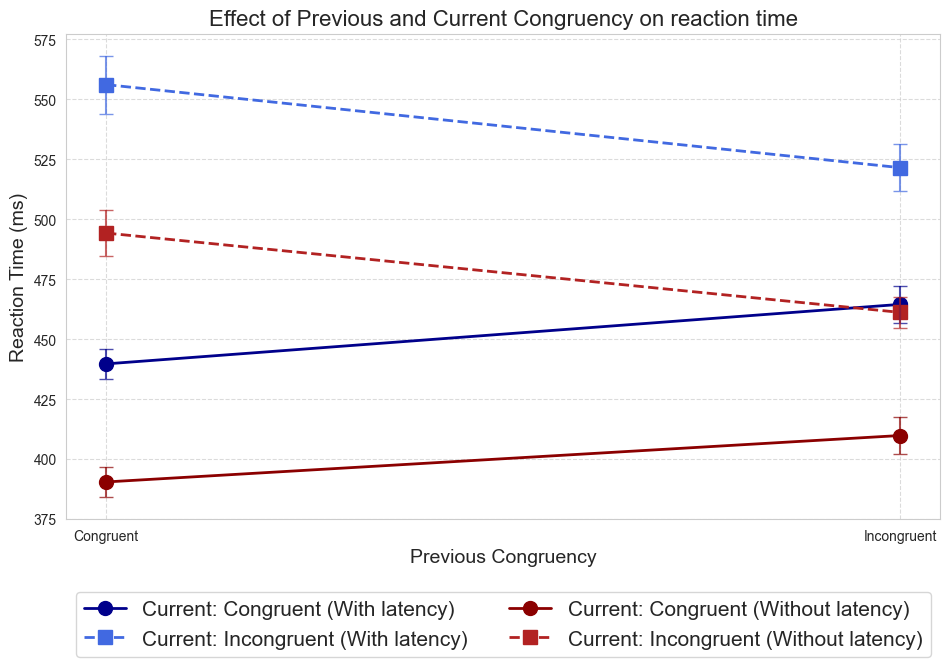

In [ ]:
visualize_anova_results_combined_single_plot(aggregated_df_with_latency, aggregated_df_no_latency, "reactiontime", "Reaction Time (ms)", "Effect of Previous and Current Congruency on reaction time")